In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [13]:
# parsing date
date_col=["report_date2"]

data=pd.read_csv("/Users/vijay.rajan/Desktop/customers/thankYou/tinuiti/US_Round2_MDL_All3.csv", 
                  parse_dates=date_col)

In [14]:
# keeping only relevant columns
data_subset = data[["report_date2", "Day Type", "Descriptor", "Holiday", "P_DIS_Revenue", 
                   "P_SEA_NetSpend", "P_SHO_NetSpend", "P_DIS_NetSpend", "P_DIS_Impressions", 
                   "P_DIS_Clicks", "P_DIS_Sessions", "P_DIS_Orders", "P_SOC_NetSpend", 
                    "P_AFF_NetSpend"]]

#creating addtional date columns
data_subset['year'] = pd.DatetimeIndex(data_subset["report_date2"]).year
data_subset['month'] = pd.DatetimeIndex(data_subset["report_date2"]).month

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data_subset.describe()
data.info()
data.dtypes

In [ ]:
# pivot the dataset
pd.pivot_table(data_subset,index=["Holiday"],aggfunc=[np.mean])

In [ ]:
#grouping the data by year
pd.pivot_table(data_subset,index=["Holiday"],values=["P_DIS_Revenue"],aggfunc=[np.mean,len])

In [5]:
#creating the holiday flag for thanksgiving, black friday, cyber monday and veterans day
data_subset["holiday_flag"] = np.where(data_subset["Holiday"].isin(["Veterans Day", "Thanksgiving Day", "Cyber Monday", "Black Friday"]), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# pivot the dataset for holiday flag to see if there is actually a difference in sales
pd.pivot_table(data_subset,index=["holiday_flag"],aggfunc=[np.mean])

mean                                                \
             P_AFF_NetSpend P_DIS_Clicks P_DIS_Impressions P_DIS_NetSpend   
holiday_flag                                                                
0               1015.935192  3737.125241      1.381507e+06    2395.763383   
1               4461.819890  3674.111111      2.912511e+06    9250.627458   

                                                                       \
             P_DIS_Orders P_DIS_Revenue P_DIS_Sessions P_SEA_NetSpend   
holiday_flag                                                            
0                 5.94605    157.281127    3202.398844    2232.882457   
1                43.00000   1352.525556    2753.222222    7399.631111   

                                                                    
             P_SHO_NetSpend P_SOC_NetSpend      month         year  
holiday_flag                                                        
0               1799.768776    2893.241194   6.250482  2017.956647  
1               7354.698889   10870.100800  11.000000  2017.666667

In [17]:
# pivot the dataset for holiday flag to see if there is actually a difference in sales
pd.pivot_table(data_subset,index=["year"],aggfunc=[np.mean])

mean                                                \
     P_AFF_NetSpend P_DIS_Clicks P_DIS_Impressions P_DIS_NetSpend   
year                                                                
2017       0.000000  8979.202740      2.363265e+06    3310.040747   
2018    1338.326361  1213.473973      1.170917e+06    2035.755194   
2019    1912.328034   605.287066      5.370347e+05    1952.184606   

                                                                              \
     P_DIS_Orders P_DIS_Revenue P_DIS_Sessions P_SEA_NetSpend P_SHO_NetSpend   
year                                                                           
2017    11.205479    305.049151    7764.131507    1806.184493    1323.063863   
2018     5.534247    141.566438    1072.698630    2213.738658    2348.921589   
2019     1.416404     39.166719     389.356467    2892.923407    1874.061798   

                               
     P_SOC_NetSpend     month  
year                           
2017    2230.641282  6.526027  
2018    3318.194543  6.526027  
2019    3393.344448  5.750789

In [18]:
# pivot the dataset for holiday flag to see if there is actually a difference in sales
pd.pivot_table(data_subset,index=["year"],aggfunc=[np.sum])

sum                                                \
     P_AFF_NetSpend P_DIS_Clicks P_DIS_Impressions P_DIS_NetSpend   
year                                                                
2017       0.000000      3277409         862591765   1.208165e+06   
2018  488489.121894       442918         427384803   7.430506e+05   
2019  606207.986846       191876         170239987   6.188425e+05   

                                                                              \
     P_DIS_Orders P_DIS_Revenue P_DIS_Sessions P_SEA_NetSpend P_SHO_NetSpend   
year                                                                           
2017         4090     111342.94        2833908      659257.34      482918.31   
2018         2020      51671.75         391535      808014.61      857356.38   
2019          449      12415.85         123426      917056.72      594077.59   

                           
     P_SOC_NetSpend month  
year                       
2017   8.141841e+05  2382  
2018   1.211141e+06  2382  
2019   1.075690e+06  1823

In [19]:
#simply looking at veteran's day revenue vs previous years
data_subset.loc[data_subset["Holiday"] == "Veterans Day"]

,report_date2,Day Type,Descriptor,Holiday,P_DIS_Revenue,P_SEA_NetSpend,P_SHO_NetSpend,P_DIS_NetSpend,P_DIS_Impressions,P_DIS_Clicks,P_DIS_Sessions,P_DIS_Orders,P_SOC_NetSpend,P_AFF_NetSpend,year,month
314,2017-11-11,Promo day- high,50% off,Veterans Day,4250.04,2740.26,2739.90,15272.65522,4739541,6795,5240,114,2475.432526,0.00000,2017,11
679,2018-11-11,Promo day- high,50% off,Veterans Day,176.00,3049.41,4148.66,1520.42000,489781,889,777,4,4068.560000,7024.26680,2018,11
1044,2019-11-11,Promo day- high,50% off,Veterans Day,74.50,4481.21,2337.54,2790.82000,511749,438,254,4,9065.210000,10822.29331,2019,11


In [ ]:
#getting the percent of rows with 0 value in the target
1-(np.count_nonzero(data_subset["P_DIS_Revenue"])/data_subset.shape[0])

In [ ]:
#drop year and month and write out the datafile
data_subset.drop(["year", "month"],axis=1,inplace=True)
data_subset.to_csv("tinuiti_data.csv",index=False)

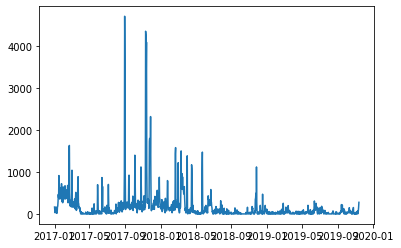

In [11]:
#plotting the revenue
plt.plot(data_subset["report_date2"], data_subset["P_DIS_Revenue"])